# NumPy

数值计算是科学研究领域使用最多的编程功能。虽然Python自带了一些基本的数学函数以及列表、元组等数据结构，然而并没有对向量运算的天然支持，因而我们需要NumPy这个包来支持Python中的向量运算。

NumPy提供了丰富的数值计算方法，由于篇幅所限，我们无法介绍所有的NumPy特性，更多的参考可以从NumPy（包括SciPy）的网站： https://docs.scipy.org/doc/ 找到更加详细的参考。

## 向量的创建

NumPy最核心的是提供了向量和矩阵两个数据结构，可以方便的使用这些数据结构进行向量的加、减、数乘，以及矩阵的加、减、数乘、乘法、求逆、矩阵分解等运算。

在Python中，如果需要使用NumPy，首先要使用pip安装numpy，接着在文件中导入numpy。numpy.array()函数提供了将一个列表转化为一个向量的方法，比如：

In [1]:
import numpy as np

a = np.array([1, 2, 3])  #创建一个三维向量
print('向量a=', a)

向量a= [1 2 3]


此外，还有一些其他的方法创建向量，比如：

In [2]:
b = np.ones(3)  #创建一个元素全为1的三维向量
print('b=', b)
b0 = np.zeros(3)  #创建一个元素全为0的3维向量
print('b0=', b0)
iota = np.full(5, 3.14)  #创建一个所有元素全为3.14的5维向量
print(iota)

b= [1. 1. 1.]
b0= [0. 0. 0.]
[3.14 3.14 3.14 3.14 3.14]


需要说明的是，在NumPy中，每个array都有严格的类型规定，比如：

* bool_ ：布尔值True/False，一个字节
* int_  ：整型，默认
* intc  ：与C语言的int相同的整型
* int8\int16\int32\int64 ：指定位数的整型
* uint8\uint16\uint32\uint64 ：指定位数的无符号整型
* float_\float64 ：双精度浮点型
* float16 ：半精度浮点型
* float32 ：单精度浮点型
* complex_\complex128 ：复数，两个双精度浮点型表示
* complex64 ：复数，两个单精度浮点型表示

大多数情况下我们不必担心类型的问题，但是如果需要与C交互，或者希望优化代码速度、与PyTorch交互等，可能是一个比较重要的优化方向，比如一般而言如果对精度要求不高，单精度显然比双精度的运算要快得多。

如果在创建向量时需要制定类型，可以用dtype选项，如：

In [3]:
c = np.array([1, 2, 3], dtype='float32')
print(c)

[1. 2. 3.]


以上代码中，我们创建了一个向量，虽然全是整数，但是由于我们指定了类型为单精度浮点型，所以显示时会有小数点。

如果需要转换数据类型，使用astype()方法转换即可：

In [4]:
c = c.astype('int')
c

array([1, 2, 3])

还有两个更加常用的函数:arange(n1,n2,step)以及linespace(n1,n2,N)。其中numpy.arange函数与Python中的range函数类似，创建一个\[n1,n2)的步长为step的数组；而numpy.linespace函数创建从\[n1,n2\]区间平均分为N等份的网格点：

In [5]:
r = np.arange(1, 101, 10)
print(r)
lp = np.linspace(0, 5, 20)  #0到5等分20等分
print("0到5等分20等分：\n", lp)


[ 1 11 21 31 41 51 61 71 81 91]
0到5等分20等分：
 [0.         0.26315789 0.52631579 0.78947368 1.05263158 1.31578947
 1.57894737 1.84210526 2.10526316 2.36842105 2.63157895 2.89473684
 3.15789474 3.42105263 3.68421053 3.94736842 4.21052632 4.47368421
 4.73684211 5.        ]


最后，如果需要创建一个未初始化的向量，可以使用numpy.empty函数，但是注意，因为没有初始化，所以得到的向量中的值可能是任何情况，完全取决于申请的内存的状态，因而使用之前一定要通过某种方式进行初始化。

In [6]:
a = np.empty(10, dtype='bool_')
print(a)

[False False False False False False False False False False]


# 向量运算

NumPy支持很多向量运算，比如：

In [7]:
print("基本数学运算：元素对元素运算")
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])
print('数乘：3*a=', 3 * a)
print('a-b=', a - b)
print('a+b=', a + b)
print('a*b=', a * b)
print('b/a=', b / a)
print('向量运算')
c = np.dot(a, b)  #a.*b
print('点乘（内积）a.*b=', c)
c = np.inner(a, b)  #a.*b
print('点乘（内积）a.*b=', c)
d = np.outer(a, b)
print('外积(a,b)=\n', d)
print("---数组排序---")
e = np.array([3., 4, 1, 8, 2, 7])
print("e=", e)
sorted_e = np.sort(e)
print("排序后的e：", sorted_e)
argsort_e = np.argsort(e)
print("e中每个元素的排位：", argsort_e)
print("使用np.sort()函数不改变原来的b：", e)
e.sort()
print("使用e.sort()会替换原来的e：", e)


基本数学运算：元素对元素运算
数乘：3*a= [ 3  6  9 12 15]
a-b= [-4 -2  0  2  4]
a+b= [6 6 6 6 6]
a*b= [5 8 9 8 5]
b/a= [5.  2.  1.  0.5 0.2]
向量运算
点乘（内积）a.*b= 35
点乘（内积）a.*b= 35
外积(a,b)=
 [[ 5  4  3  2  1]
 [10  8  6  4  2]
 [15 12  9  6  3]
 [20 16 12  8  4]
 [25 20 15 10  5]]
---数组排序---
e= [3. 4. 1. 8. 2. 7.]
排序后的e： [1. 2. 3. 4. 7. 8.]
e中每个元素的排位： [2 4 0 1 5 3]
使用np.sort()函数不改变原来的b： [3. 4. 1. 8. 2. 7.]
使用e.sort()会替换原来的e： [1. 2. 3. 4. 7. 8.]


这里要特别特别注意的是，向量的乘法\*和除法定义的是**元素对元素**的乘除法，这点与MATLAB等有很大不同。

## 多维矩阵及其运算

除了可以使用numpy.array()创建向量，也可以创建矩阵，创建矩阵时，提供一个列表的列表，每个列表代表矩阵中的**一行**：

In [8]:
A = np.array([[1, 2, 3], [4, 8, 6], [4, 3, 2]])
print("矩阵A=\n", A)

矩阵A=
 [[1 2 3]
 [4 8 6]
 [4 3 2]]


此外NumPy还支持多维矩阵，比如一个$3\times 3\times 3$的矩阵：

In [9]:
B = np.array([[[1, 2, 3], [4, 8, 6], [4, 3, 2]],
              [[3, 4, 5], [7, 5, 6], [9, 2, 0]],
              [[1, 1, 1], [2, 2, 2], [4, 4, 4]]])
print("矩阵B=\n", B)


矩阵B=
 [[[1 2 3]
  [4 8 6]
  [4 3 2]]

 [[3 4 5]
  [7 5 6]
  [9 2 0]]

 [[1 1 1]
  [2 2 2]
  [4 4 4]]]


为了查看矩阵的维度，可以使用ndim属性：

In [10]:
a = np.array([1, 2, 3])
print(a.ndim)
print(A.ndim)
print(B.ndim)

1
2
3


如果希望查看每个维度的大小，可以用shape属性：

In [11]:
print(a.shape)
print(A.shape)
print(B.shape)

(3,)
(3, 3)
(3, 3, 3)


如果希望查看矩阵的总大小，可以用size属性：

In [12]:
print(a.size)
print(A.size)
print(B.size)

3
9
27


如果需要知道矩阵的数据类型，用dtype属性：

In [13]:
print(a.dtype)
print(A.dtype)
print(B.dtype)

int64
int64
int64


之前生成向量的函数几乎都可以用来生成矩阵，仅仅需要将维数换为一个元组，比如如果要生成一个二维矩阵，就用元组给出行数和列数：

In [14]:
M = np.zeros((3, 3), dtype='int_')  #全为0的矩阵3阶方阵
print("矩阵M=\n", M)
O = np.ones((3, 3))  #全为1的矩阵3阶方阵
print("矩阵O=\n", O)
I = np.eye(3)  #单位阵
print("矩阵I=\n", I)
P = np.full((2, 3), 2.718)  #全为2.718的矩阵2-by-3矩阵
print("矩阵P=\n", P)
E = np.empty((2, 3), dtype='bool_')  #全为2.718的矩阵2-by-3矩阵
print("矩阵E=\n", E)


矩阵M=
 [[0 0 0]
 [0 0 0]
 [0 0 0]]
矩阵O=
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
矩阵I=
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
矩阵P=
 [[2.718 2.718 2.718]
 [2.718 2.718 2.718]]
矩阵E=
 [[ True  True  True]
 [ True  True  True]]


矩阵的运算与向量的运算同理：

In [15]:
A = np.array([[1, 2, 3], [4, 8, 6], [4, 3, 2]])
print("A=\n", A)
O = np.ones((3, 3))  #全为1的矩阵3阶方阵
I = np.eye(3)  #单位阵
print("A+I=\n", A + I)
print("A-I=\n", A - I)
print("A*I=\n", A * I)
print("I/A=\n", I / A)
print("矩阵相乘，A@O=\n", np.dot(A, O))
print("矩阵相乘，O@A=\n", np.dot(O, A))
print("矩阵相乘，A@O=\n", A @ O)
print("矩阵相乘，O@A=\n", O @ A)
print("矩阵的迹，trace(A)=\n", np.trace(A))
At = A.transpose()
print("矩阵转置，tranpose(A)=\n", At)
AT = A.T
print("矩阵转置，A.T=\n", AT)
print("矩阵转换为向量，vec(A)=", A.flatten())
print("Kronecker乘积A⊗I=\n", np.kron(A, I))
print("---矩阵排序---")
print("按行排序：\n", np.sort(A, axis=1))
print("按列排序：\n", np.sort(A, axis=0))


A=
 [[1 2 3]
 [4 8 6]
 [4 3 2]]
A+I=
 [[2. 2. 3.]
 [4. 9. 6.]
 [4. 3. 3.]]
A-I=
 [[0. 2. 3.]
 [4. 7. 6.]
 [4. 3. 1.]]
A*I=
 [[1. 0. 0.]
 [0. 8. 0.]
 [0. 0. 2.]]
I/A=
 [[1.    0.    0.   ]
 [0.    0.125 0.   ]
 [0.    0.    0.5  ]]
矩阵相乘，A@O=
 [[ 6.  6.  6.]
 [18. 18. 18.]
 [ 9.  9.  9.]]
矩阵相乘，O@A=
 [[ 9. 13. 11.]
 [ 9. 13. 11.]
 [ 9. 13. 11.]]
矩阵相乘，A@O=
 [[ 6.  6.  6.]
 [18. 18. 18.]
 [ 9.  9.  9.]]
矩阵相乘，O@A=
 [[ 9. 13. 11.]
 [ 9. 13. 11.]
 [ 9. 13. 11.]]
矩阵的迹，trace(A)=
 11
矩阵转置，tranpose(A)=
 [[1 4 4]
 [2 8 3]
 [3 6 2]]
矩阵转置，A.T=
 [[1 4 4]
 [2 8 3]
 [3 6 2]]
矩阵转换为向量，vec(A)= [1 2 3 4 8 6 4 3 2]
Kronecker乘积A⊗I=
 [[1. 0. 0. 2. 0. 0. 3. 0. 0.]
 [0. 1. 0. 0. 2. 0. 0. 3. 0.]
 [0. 0. 1. 0. 0. 2. 0. 0. 3.]
 [4. 0. 0. 8. 0. 0. 6. 0. 0.]
 [0. 4. 0. 0. 8. 0. 0. 6. 0.]
 [0. 0. 4. 0. 0. 8. 0. 0. 6.]
 [4. 0. 0. 3. 0. 0. 2. 0. 0.]
 [0. 4. 0. 0. 3. 0. 0. 2. 0.]
 [0. 0. 4. 0. 0. 3. 0. 0. 2.]]
---矩阵排序---
按行排序：
 [[1 2 3]
 [4 6 8]
 [2 3 4]]
按列排序：
 [[1 2 2]
 [4 3 3]
 [4 8 6]]


同样，**乘法\*和除法/定义的是元素对元素的乘除法，切记！**，如果需要计算矩阵相乘，需要使用**numpy.dot()函数或者「@」运算符**！

此外，numpy.linalg包里面包含了很多线性代数特性，比如常见的有：

* 矩阵分解
    - linalg.cholesky()
    - linalg.svd()
    - linalg.qr()
* 特征值特征向量
    - linalg.eig()
* 范数、条件数、行列式
    - linalg.norm()
    - linalg.cond()
    - linalg.det()
* 求逆
    - linalg.inv()

具体函数列表可以查看 https://docs.scipy.org/doc/numpy/reference/routines.linalg.html 。

In [16]:
A = np.array([[0.3, 0.2, 0.5], [0, 0.4, 0.6], [0.8, 0.1, 0.1]])
print("A=\n", A)
print("A的范数=\n", np.linalg.norm(A))
print("A的行列式=\n", np.linalg.det(A))
print("A的秩=\n", np.linalg.matrix_rank(A))
eigv, eigvec = np.linalg.eig(A)
print("A的特征值=\n", eigv)
print("A的特征向量=\n", eigvec)
print("A的逆矩阵=\n", np.linalg.inv(A))


A=
 [[0.3 0.2 0.5]
 [0.  0.4 0.6]
 [0.8 0.1 0.1]]
A的范数=
 1.2489995996796797
A的行列式=
 -0.07
A的秩=
 3
A的特征值=
 [ 1.         -0.38284271  0.18284271]
A的特征向量=
 [[ 0.57735027  0.37378594  0.1510278 ]
 [ 0.57735027  0.56422312 -0.92952224]
 [ 0.57735027 -0.73616326  0.33642088]]
A的逆矩阵=
 [[ 0.28571429 -0.42857143  1.14285714]
 [-6.85714286  5.28571429  2.57142857]
 [ 4.57142857 -1.85714286 -1.71428571]]


## 随机数生成

科学计算中很多算法都依赖于随机数的生成，比如数值积分计算的Monte Carlo法、MCMC等方法。在Python中，自带了numpy.random包，可以用来生成随机数。

为了使用numpy.random，必须先导入：
```python
import numpy.random as nprd
```

接下来，就可以直接使用了。比如，

* nprd.random(n)产生一个n维向量，每个分量都服从均匀分布的随机数；
* nprd.randn(n)产生一个n维向量，每个分量都服从正态分布的随机数；
* nprd.choice(a)从向量a中随机抽取一个元素

......

具体随机数列表可以查看 https://docs.scipy.org/doc/numpy-1.16.1/reference/routines.random.html

In [17]:
import numpy.random as nprd

a = nprd.random((4, 5))  ##产生一个4-by-5的随机数矩阵，每个随机数为（0,1）上的均匀分布
print("a=\n", a)
b = nprd.normal(0, 1, (4, 5))  ##产生一个4-by-5的随机数矩阵，每个随机数为标准正态分布
print("b=\n", b)
c = nprd.randint(0, 100, 20)  ##产生一个20维的随机数向量，每个随机数为[0,100)中随机挑一个整数
print("c=\n", c)
rand_choose_c = nprd.choice(c)
print("从c中随机抽取一个元素：", rand_choose_c)

a=
 [[0.04340426 0.7909109  0.18375551 0.19514585 0.35638683]
 [0.54851733 0.30639564 0.13439683 0.12092426 0.79697791]
 [0.05454883 0.18189691 0.05639691 0.08597739 0.02679366]
 [0.382213   0.46293839 0.3932551  0.07849444 0.74504729]]
b=
 [[-2.08979622  0.77578712 -0.50327421  0.14761915  1.38606337]
 [-0.34127289 -0.66856376  1.23712492  1.16171185 -0.75458511]
 [ 0.76213109  0.35530468 -0.76490363  0.7225468   1.23006038]
 [-1.31112025  0.08770406 -1.01490516  1.1392862   1.78563473]]
c=
 [65 96 30 52 86 46 85 46 57 81 54 49 36 71 91 68 35 13 57 18]
从c中随机抽取一个元素： 36


## 切片与掩码

如果需要提取出矩阵的元素，可以使用 **A\[row,col\]（而非A\[row\]\[col\]！！）**。比如：

In [18]:
a = nprd.random((4, 5))
print("a=\n", a)
print("a[2,3]=", a[2, 3])


a=
 [[0.63940414 0.66208283 0.01718525 0.25493304 0.09900915]
 [0.63031322 0.01714761 0.78498405 0.81811827 0.5602409 ]
 [0.0180267  0.47643148 0.27382918 0.60029962 0.71508022]
 [0.55040589 0.67027795 0.42165286 0.8917752  0.47177456]]
a[2,3]= 0.6002996188437633


此外与Python的列表一样，可以进行切片操作，语法为：
```python
a[start:stop:step]
```

其中a为向量，start为起始位置，stop为最终位置（不含），step为步长，如果start缺失则为从最开始，stop缺失则为直到最后。比如：

In [19]:
a = np.array([1, 2, 3, 4, 5])
print("a的前三位：", a[:3])
print("a的后三位：", a[-3:])
print("a的奇数位：", a[::2])

a的前三位： [1 2 3]
a的后三位： [3 4 5]
a的奇数位： [1 3 5]


当然，矩阵也可以类似操作：

In [20]:
A = nprd.random((5, 5))
print("A=\n", A)
print("A的前三列=\n", A[:, :3])
print("A的后三行=\n", A[-3:, :])
print("A的奇数行、偶数列=\n", A[::2, 1::2])


A=
 [[0.77709009 0.02241084 0.0523895  0.31434852 0.84155323]
 [0.18619018 0.37800491 0.84831637 0.54436599 0.00458324]
 [0.46856313 0.95820692 0.41924615 0.48875971 0.15467625]
 [0.85542471 0.25781194 0.48959265 0.79447934 0.08808097]
 [0.22711056 0.60553644 0.26932497 0.63389038 0.10358232]]
A的前三列=
 [[0.77709009 0.02241084 0.0523895 ]
 [0.18619018 0.37800491 0.84831637]
 [0.46856313 0.95820692 0.41924615]
 [0.85542471 0.25781194 0.48959265]
 [0.22711056 0.60553644 0.26932497]]
A的后三行=
 [[0.46856313 0.95820692 0.41924615 0.48875971 0.15467625]
 [0.85542471 0.25781194 0.48959265 0.79447934 0.08808097]
 [0.22711056 0.60553644 0.26932497 0.63389038 0.10358232]]
A的奇数行、偶数列=
 [[0.02241084 0.31434852]
 [0.95820692 0.48875971]
 [0.60553644 0.63389038]]


另外，这里与Python中的另外一个不同是，在Python的列表中，实行切片操作是直接对切片出的元素进行复制，而在NumPy中，切片操作只是一个 **视图**（ **view** ），并没有进行复制。理解这一点是非常关键的，比如：

In [21]:
lista = [1, 2, 3, 4]
suba = lista[1:3]
suba[0] = 1
print(lista)
print(suba)
veca = np.array([1, 2, 3, 4])
suba = veca[1:3]
suba[0] = 1
print(veca)
print(suba)
A = nprd.random((2, 3))
print("A=\n", A)
At = A.transpose()
print("矩阵转置，tranpose(A)=\n", At)
AT = A.T
print("矩阵转置，A.T=\n", AT)
At[0, 0] = 2
print("A=\n", A)
AT[0, 0] = 3
print("A=\n", A)


[1, 2, 3, 4]
[1, 3]
[1 1 3 4]
[1 3]
A=
 [[0.96906228 0.53047184 0.02977598]
 [0.04311293 0.59802279 0.68901255]]
矩阵转置，tranpose(A)=
 [[0.96906228 0.04311293]
 [0.53047184 0.59802279]
 [0.02977598 0.68901255]]
矩阵转置，A.T=
 [[0.96906228 0.04311293]
 [0.53047184 0.59802279]
 [0.02977598 0.68901255]]
A=
 [[2.         0.53047184 0.02977598]
 [0.04311293 0.59802279 0.68901255]]
A=
 [[3.         0.53047184 0.02977598]
 [0.04311293 0.59802279 0.68901255]]


因而，在对数组、矩阵进行切片、修改时，需要特别注意。

如果需要创建切片的副本，需要用copy()方法：

In [22]:
veca = np.array([1, 2, 3, 4])
suba = veca[1:3].copy()
suba[0] = 1
print(veca)
print(suba)

[1 2 3 4]
[1 3]


或者，也可以直接在切片时提供一个列表，制定需要选取的列元素，比如：

In [23]:
A = nprd.random(5)
print("A=\n", A)
selec = [1, 0, 3]
print("A selected=\n", A[selec])
B = np.arange(15).reshape(5, 3)
print("B=\n", B)
print("B selected rows=\n", B[selec, :])
selec_col = [2, 1, 0]
print("B selected elements=\n", B[selec, selec_col])


A=
 [0.88330223 0.06866465 0.19414245 0.6000438  0.05463517]
A selected=
 [0.06866465 0.88330223 0.6000438 ]
B=
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
B selected rows=
 [[ 3  4  5]
 [ 0  1  2]
 [ 9 10 11]]
B selected elements=
 [5 1 9]


需要注意当我们给出了两个列表作为选择依据时，实际上选出的是B[1,2]、B[0,1]、B[3,0]，而非子矩阵。如果需要选出子矩阵，应该这样写：

In [24]:
print("B selected colomns and rows=\n", B[selec, :][:, selec_col])


B selected colomns and rows=
 [[ 5  4  3]
 [ 2  1  0]
 [11 10  9]]


有时我们可能希望在一个数组或者矩阵中挑出满足条件的元素，此时可以使用NumPy中特有的掩码功能。

首先需要明确的是，如果对一个NumPy数组进行逻辑运算，会返回一个逻辑数组，比如：

In [25]:
a = np.array([1, 2, 3])
print("a>=2:\n", a >= 2)
b = nprd.random((5, 5))
print("b<0.5:\n", b < 0.5)


a>=2:
 [False  True  True]
b<0.5:
 [[False  True  True False  True]
 [ True  True  True  True  True]
 [ True False  True False False]
 [False  True  True False  True]
 [False False False False  True]]


在Python中，True如果参与数值计算会被当做1，False参与数值计算会被当做0：

In [26]:
(a >= 2) + 1


array([1, 2, 2])

In [27]:
print("矩阵b中小于0.5的元素个数=", (b < 0.5).sum())


矩阵b中小于0.5的元素个数= 14


我们可以使用逻辑数组作为选择器将符合条件的元素挑选出来，并放在一个NumPy数组中，比如：

In [28]:
print("向量a中大于等于2的元素：\n", a[a >= 2])
print("矩阵b中小于0.5的元素：\n", b[b < 0.5])


向量a中大于等于2的元素：
 [2 3]
矩阵b中小于0.5的元素：
 [0.0213765  0.19783485 0.14066818 0.49510739 0.49870896 0.29876101
 0.00727874 0.27923288 0.33757023 0.37595328 0.0686813  0.30729827
 0.12482139 0.31934235]


注意虽然b是一个二维矩阵，但是由于我们需要挑选元素，所以最终挑选出来的元素放在了一个向量里面。

需要注意的是，在Python中，逻辑运算的运算符为 and or not，以上三个运算符是将操作对象**当做整体**进行比较。而在NumPy里面，为了进行逐位的比较，需要用到：

* 逻辑与：&
* 逻辑或：|
* 逻辑非：~
* 异或： ^

比如，如果需要提取出在0.3-0.7之间的元素，应该用：

In [29]:
print("矩阵b中0.3-0.7的元素：\n", b[(b < 0.7) & (b > 0.3)])


矩阵b中0.3-0.7的元素：
 [0.63339916 0.68585428 0.49510739 0.49870896 0.33757023 0.60527608
 0.37595328 0.30729827 0.50300516 0.6228774  0.51044505 0.31934235]


此外还可以配合any()和all()函数进行一些高阶的判断，比如：

In [30]:
print("a=", a)
print("a中是否有大于3的数字？", (a > 3).any())
print("a中是否有大于等于3的数字？", (a >= 3).any())
print("b=", b)
print("b中是否所有数字都大于0.2？", (b > 0.2).all())
print("b中每一行是否所有数字都大于0.2\n", (b > 0.2).all(axis=1))
print("b中每一列是否所有数字都大于0.2\n", (b > 0.2).all(axis=0))


a= [1 2 3]
a中是否有大于3的数字？ False
a中是否有大于等于3的数字？ True
b= [[0.63339916 0.0213765  0.19783485 0.68585428 0.14066818]
 [0.49510739 0.49870896 0.29876101 0.00727874 0.27923288]
 [0.33757023 0.60527608 0.37595328 0.90754013 0.94841075]
 [0.90092592 0.0686813  0.30729827 0.50300516 0.12482139]
 [0.83259339 0.96548015 0.6228774  0.51044505 0.31934235]]
b中是否所有数字都大于0.2？ False
b中每一行是否所有数字都大于0.2
 [False False  True False  True]
b中每一列是否所有数字都大于0.2
 [ True False False False False]


最后，还有一个小的技巧，np.where()函数可以返回满足条件的元素的坐标，比如：

In [31]:
print("b=", b)
axis_b = np.where(b > 0.8)
print("大于0.8坐标=", axis_b)


b= [[0.63339916 0.0213765  0.19783485 0.68585428 0.14066818]
 [0.49510739 0.49870896 0.29876101 0.00727874 0.27923288]
 [0.33757023 0.60527608 0.37595328 0.90754013 0.94841075]
 [0.90092592 0.0686813  0.30729827 0.50300516 0.12482139]
 [0.83259339 0.96548015 0.6228774  0.51044505 0.31934235]]
大于0.8坐标= (array([2, 2, 3, 4, 4]), array([3, 4, 0, 0, 1]))


## 向量、矩阵的变形、合并和分裂

对于向量、矩阵的另外一个更常用的操作是变形，一般而言我们可以使用reshape方法变形，但是值得注意的是该方法变形仍然是一个视图而非副本。比如，我们可能将一个向量变形为一个矩阵，可以按照如下的方法：

In [32]:
vec_a = np.linspace(0, 8, 9)
print("vec_a:\n", vec_a)
mat_a = vec_a.reshape(3, 3)
print("mat_a:\n", mat_a)
vec_b = vec_a.reshape(9, 1)
print("vec_b:\n", vec_b)
mat_a[1, 2] = 0  ##注意reshape也是视图
print("vec_a:\n", vec_a)


vec_a:
 [0. 1. 2. 3. 4. 5. 6. 7. 8.]
mat_a:
 [[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
vec_b:
 [[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]]
vec_a:
 [0. 1. 2. 3. 4. 0. 6. 7. 8.]


或者，如果需要将一个矩阵变为行向量或者列向量，还可以在切片中使用newaxis关键字，比如：

In [33]:
a = nprd.random(3)[:, np.newaxis]  #改成列向量
print(a)
b = nprd.random(3)[np.newaxis, :]  #改成行矩阵
print(b)


[[0.71062952]
 [0.35282858]
 [0.5331616 ]]
[[0.66843873 0.14857047 0.51056965]]


如果需要拼接两个矩阵，此时需要使用np.concatenate、np.vstack、np.hstack三个方法。

np.concatenate方法用于拼接向量，比如：

In [34]:
a = np.array([1, 2, 3])
b = np.array([4, 5])
c = np.array([6, 7, 8, 9])
vec = np.concatenate([a, b, c])
print(vec)

[1 2 3 4 5 6 7 8 9]


np.vstack用于竖直拼接矩阵，hstack用于水平拼接举着，比如：

In [35]:
mat_a = np.linspace(0, 8, 9).reshape(3, 3)
mat_b = np.linspace(10, 18, 9).reshape(3, 3)
print("mat_a:\n", mat_a)
print("mat_b:\n", mat_b)
mat_hab = np.hstack([mat_a, mat_b])
print("mat_hab:\n", mat_hab)
mat_vab = np.vstack([mat_a, mat_b])
print("mat_hab:\n", mat_vab)
vec_a = np.array([1, 2, 3])[:, np.newaxis]
mat_vec_aa = np.hstack([mat_a, vec_a])
print("mat_vec_aa=\n", mat_vec_aa)


mat_a:
 [[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
mat_b:
 [[10. 11. 12.]
 [13. 14. 15.]
 [16. 17. 18.]]
mat_hab:
 [[ 0.  1.  2. 10. 11. 12.]
 [ 3.  4.  5. 13. 14. 15.]
 [ 6.  7.  8. 16. 17. 18.]]
mat_hab:
 [[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [10. 11. 12.]
 [13. 14. 15.]
 [16. 17. 18.]]
mat_vec_aa=
 [[0. 1. 2. 1.]
 [3. 4. 5. 2.]
 [6. 7. 8. 3.]]


## 广播

一般情况下，如果两个向量、矩阵的维数不同，是不能进行加减乘除的运算的，但是在NumPy中，引入了**广播**功能，使得我们能够方便的进行一些运算，比如：

In [36]:
A = np.array([[1, 2, 4], [2, 3, 4], [5, 3, 1]])
B = np.array([1, 1, 2])
C = A - B
print(C)

[[ 0  1  2]
 [ 1  2  2]
 [ 4  2 -1]]


Python在执行以上的运算时，实际执行步骤是：

1. 先计算A的维数为3-by-3，B的维数为3，两者维数不匹配，此时Python会将比较小的维数左边用1来扩充，即B的维数为1-by-3
2. 现在两者还是不匹配，Python会将B的第一个维度扩充，扩充为3-by-3之后就可以运算了。

为了更深入理解，我们看下面的例子：

In [37]:
a = np.array([[1], [2], [3]])
b = np.array([3, 4, 5])
c = a - b
print(c)

[[-2 -3 -4]
 [-1 -2 -3]
 [ 0 -1 -2]]


在以上例子中，Python实际执行的是：

1. a的维数为3-by-1，b的维数为3，因而扩充b的维数为1-by-3
2. 现在两个维数都不匹配，Python自动将a扩充为3-by-3的矩阵，并将b扩充为3-by-3的矩阵，再进行加减

## 向量函数

在此之前，我们曾经介绍过使用Python中自带的math包中的exp、sin、cos等函数。现在想象以下，为了计算一个向量每个分量的指数函数，我们不得不写一个循环：

In [38]:
import math

a = np.array([1, 2, 3])
b = np.array([math.exp(i) for i in a])
print(b)

[ 2.71828183  7.3890561  20.08553692]


然而，Python的循环非常的缓慢，如果数据量巨大，以上做法非常耗时。幸运的是，NumPy为我们提供了非常强大的函数功能，比如：

In [39]:
a = np.array([1, 0.5, -3])
print('a=', a)
print('cos(a)=', np.cos(a))
print('exp(a)=', np.exp(a))
print('ln(a)=', np.log(a))
print('abs(a)=', np.abs(a))


a= [ 1.   0.5 -3. ]
cos(a)= [ 0.54030231  0.87758256 -0.9899925 ]
exp(a)= [2.71828183 1.64872127 0.04978707]
ln(a)= [ 0.         -0.69314718         nan]
abs(a)= [1.  0.5 3. ]


/tmp/ipykernel_766/3885028909.py:5: RuntimeWarning: invalid value encountered in log
  print('ln(a)=', np.log(a))


注意log(-3)在上面计算得到nan，该值实际上是np.nan，即「not a number」，不是个数字，需要额外注意。

以上这些函数直接对array进行操作，将循环放在底层，从而解约了大量时间，比如以下代码比较了这些写法的区别：

In [40]:
a = np.linspace(1, 1000, 1000000)
import time
## 列表推断
start = time.time()
b = np.array([np.log(x) for x in a])
end = time.time()
print("列表推断时间：", end - start)
## 循环
c = np.empty(a.size)
start = time.time()
for i, x in enumerate(a):
    c[i] = np.log(x)
end = time.time()
print("循环时间：", end - start)
## Map
start = time.time()
d = map(np.log, a)
d = np.array(list(d))
end = time.time()
print("Map时间：", end - start)
## 直接做
start = time.time()
e = np.log(a)
end = time.time()
print("np.log时间：", end - start)


列表推断时间： 0.8812069892883301
循环时间： 0.9649324417114258
Map时间： 0.8153648376464844
np.log时间： 0.0037946701049804688


会发现直接使用NumPy的函数快了至少150倍时间。所以在NumPy中同样，能不用循环（列表推断、Map等）就不要用。

NumPy函数包括很多，比如：

* 算术运算
  - np.add(a,b)等价于a+b
  - np.substract(a,b)等价于a+b
  - np.multiply(a,b)等价于a*b(对应元素相乘)
  - np.divide(a,b)等价于a/b(对应元素相除)
  - np.mod(a,b)等价于a%b
  - np.power(a,b)等价于a\*\*b(对应元素的乘方)
* 累乘、累加：np.sum(), np.prod(), np.cumsum(), np.cumprod()
* 绝对值：np.abs()
* 取整与符号：np.floor(), np.ceil(), np.trunc(), np.rint(), np.sign()
* 三角函数： np.sin(), np.cos(), ......
* 对数、指数：np.exp(), np.log(), np.exp2(), np.log2(), np.log10(), np.exp1m(), np.log1p(), np.power(), np.square(), np.cbrt().....
* 判断： np.isnan(), np.isinf(), np.isfinete(),......
* 特殊函数：SciPy中包含很多，如Gamma函数、Beta函数等，一般在scipy.special中

函数列表可以从 https://docs.scipy.org/doc/numpy-1.17.0/reference/ufuncs.html 中找到。

此外以上函数还支持使用out选项制定输出，比如：

In [41]:
a = np.linspace(1, 10, 5)
b = np.linspace(-1, -10, 5)
print("a=", a)
print("b=", b)
c = np.empty(10)
np.sqrt(a, out=c[::2])
np.cbrt(b, out=c[1::2])
print("c=", c)


a= [ 1.    3.25  5.5   7.75 10.  ]
b= [ -1.    -3.25  -5.5   -7.75 -10.  ]
c= [ 1.         -1.          1.80277564 -1.48124803  2.34520788 -1.76517417
  2.78388218 -1.9789458   3.16227766 -2.15443469]


以上代码中指定了一个空的数组c，分别计算a的平方根放在c的奇数位，以及b的立方根放在c的偶数位。

最后，NumPy还提供了方便的数据加总函数，比如求和、平均数、最大值、最小值、中位数等。

比如，以下代码中，我们随机产生了一组正态分布的数据，并计算了其和和、平均数、最大值、最小值、中位数、四分位数：

In [42]:
a = np.linspace(0, 100, 21)
print("a=", a)
print("%s：%f" % ("和", np.sum(a)))
print("%s：%f" % ("均值", np.mean(a)))
print("%s：%f" % ("最大值", np.max(a)))
print("%s：%f" % ("最大值索引", np.argmax(a)))
print("%s：%f" % ("最小值", np.min(a)))
print("%s：%f" % ("最小值索引", np.argmin(a)))
print("%s：%f" % ("中位数", np.median(a)))
print("%s：%f" % ("上四分位数", np.percentile(a, 75)))
print("%s：%f" % ("上四分位数", np.percentile(a, 25)))
print("%s：%f" % ("标准差", np.std(a)))
print("%s：%f" % ("方差", np.var(a)))
print("%s：%f" % ("乘积", np.prod(a)))
print("累加=", np.cumsum(a))
print("累乘=", np.cumprod(a))

a= [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]
和：1050.000000
均值：50.000000
最大值：100.000000
最大值索引：20.000000
最小值：0.000000
最小值索引：0.000000
中位数：50.000000
上四分位数：75.000000
上四分位数：25.000000
标准差：30.276504
方差：916.666667
乘积：0.000000
累加= [   0.    5.   15.   30.   50.   75.  105.  140.  180.  225.  275.  330.
  390.  455.  525.  600.  680.  765.  855.  950. 1050.]
累乘= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


不过，以上代码可能会有问题，如果向量中存在缺失值（比如NaN），以上函数也会计算出NaN。为了避免这一个问题，可以使用以上程序的安全版本：

In [43]:
a = np.linspace(0, 100, 21)
print("a=", a)
print("%s：%f" % ("和", np.nansum(a)))
print("%s：%f" % ("均值", np.nanmean(a)))
print("%s：%f" % ("最大值", np.nanmax(a)))
print("%s：%f" % ("最大值索引", np.nanargmax(a)))
print("%s：%f" % ("最小值", np.nanmin(a)))
print("%s：%f" % ("最小值索引", np.nanargmin(a)))
print("%s：%f" % ("中位数", np.nanmedian(a)))
print("%s：%f" % ("上四分位数", np.nanpercentile(a, 75)))
print("%s：%f" % ("上四分位数", np.nanpercentile(a, 25)))
print("%s：%f" % ("标准差", np.nanstd(a)))
print("%s：%f" % ("方差", np.nanvar(a)))
print("%s：%f" % ("乘积", np.nanprod(a)))


a= [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]
和：1050.000000
均值：50.000000
最大值：100.000000
最大值索引：20.000000
最小值：0.000000
最小值索引：0.000000
中位数：50.000000
上四分位数：75.000000
上四分位数：25.000000
标准差：30.276504
方差：916.666667
乘积：0.000000


此外还有两个特殊的函数：numpy.any()函数用于判断一个逻辑向量（其值为True/False）是否有True；而numpy.all()用于判断逻辑向量是否全为真，比如：

In [44]:
vec_a = np.array([1, 2, 3])
print((vec_a == 2).any())
print((vec_a == 5).any())
vec_b = np.array([1, 2, 3])
print((vec_a == vec_b).all())
vec_b = np.array([1, 2, 4])
print((vec_a == vec_b).all())


True
False
True
False


而对于矩阵，以上函数还支持在哪个维度上进行求和、中位数等操作，比如：

In [45]:
a = np.linspace(0, 95, 20).reshape(4, 5)
print("a=", a)
print("总和：", np.sum(a))
print("行和：", np.sum(a, axis=1))
print("列和：", np.sum(a, axis=0))
print("总中位数：", np.median(a))
print("行中位数：", np.median(a, axis=1))
print("列中位数：", np.median(a, axis=0))
print("累积和=\n", np.cumsum(a))
print("行累积和=\n", np.cumsum(a, axis=1))
print("列累积和=\n", np.cumsum(a, axis=0))


a= [[ 0.  5. 10. 15. 20.]
 [25. 30. 35. 40. 45.]
 [50. 55. 60. 65. 70.]
 [75. 80. 85. 90. 95.]]
总和： 950.0
行和： [ 50. 175. 300. 425.]
列和： [150. 170. 190. 210. 230.]
总中位数： 47.5
行中位数： [10. 35. 60. 85.]
列中位数： [37.5 42.5 47.5 52.5 57.5]
累积和=
 [  0.   5.  15.  30.  50.  75. 105. 140. 180. 225. 275. 330. 390. 455.
 525. 600. 680. 765. 855. 950.]
行累积和=
 [[  0.   5.  15.  30.  50.]
 [ 25.  55.  90. 130. 175.]
 [ 50. 105. 165. 230. 300.]
 [ 75. 155. 240. 330. 425.]]
列累积和=
 [[  0.   5.  10.  15.  20.]
 [ 25.  35.  45.  55.  65.]
 [ 75.  90. 105. 120. 135.]
 [150. 170. 190. 210. 230.]]


# SciPy简介

SciPy在NumPy的基础上，提供了更多的数值计算的高级工具，比如：

* scipy.special：特殊函数，包括gamma函数、beta函数、各种统计函数、erf函数等等，都可以从这里找到
* scipy.optimize：提供了最优化方法
* scipy.sparse：稀疏矩阵
* scipy.interpolate：插值
* scipy.integrate：积分和常微分方程
* scipy.fftpack：快速傅里叶变换
* scipy.stats：常用的统计函数

......

在此我们不再赘述，如有需要，可以参考 https://docs.scipy.org/doc/scipy-1.2.1/reference/ 。我们也会在接下来通过实例的方式稍微介绍SciPy的用法。

# Matplotlib简介

在Python中，可以方便的是用matplotlib画图。在使用前应该使用(sudo) pip install matplotlib进行安装。

同样限于篇幅所限，我们也无法完整、详细的介绍Matplot画图的方法，我们将在实例中展示如何使用Matplot画图。

在使用Matplotlib时，如果不知道某个图该怎么画，查看文档可能是最简单的方法，其官网： https://matplotlib.org 上提供了非常详细的示例、文档。此外， https://github.com/rougier/matplotlib-tutorial 也提供了一个非常好的教程，可以参阅。

此外，基于Matplotlib基础上的Seaborn还提供了更加美化的设定以及一些方便的接口，可以同时结合Matplotlib以及Seaborn进行画图。

# 综合实例

接下来我们主要以例子的形式展示SciPy以及Matplotlib的用法

## 实例1：数据的直方图以及散点图（Matplotlib）简单应用

在接下来的例子中看我们随机生成了一组期望为0，方差为2的500个随机数，并画出了其直方图，此外我们还是用Seaborn做了一些默认的梅花：

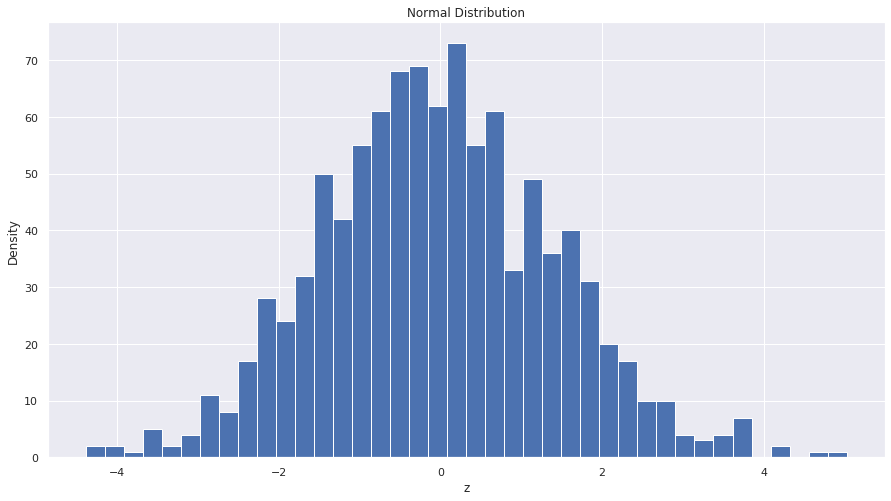

In [46]:
## 导入matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import numpy.random as nprd
sb.set()
## 使图形直接插入到jupyter中
%matplotlib inline
## 生成100个均值为0，方差为2的正态分布
z=nprd.normal(0,np.sqrt(2),1000)
# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 8.0)

plt.hist(z,bins=40) ##柱状图，20个柱子
plt.xlabel('z')
plt.ylabel("Density")
plt.title('Normal Distribution')
plt.show() ## 画图

而以下代码，产生了500个 $x \sim N\left(0,2\right)$，以及$y=x+u$，$u\sim N\left(0,1\right)$，并将其散点图、和关系图花在了同一张图上：

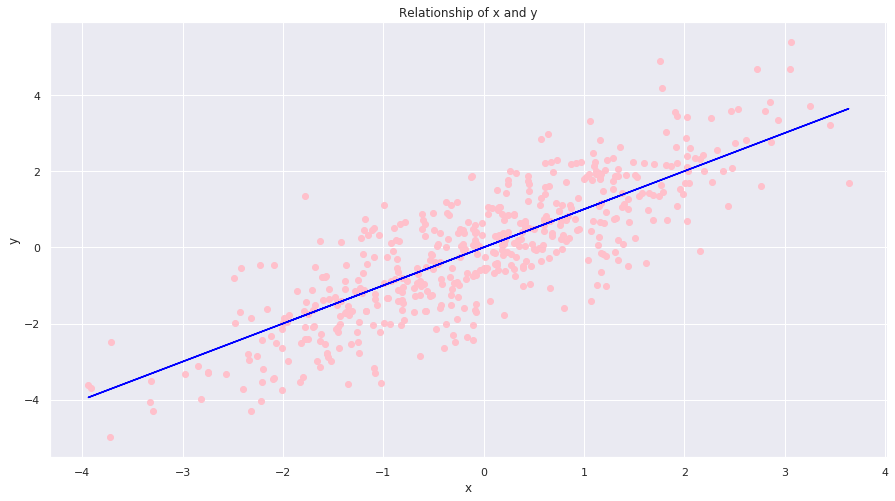

In [47]:
x = nprd.normal(0, np.sqrt(2), 500)  ## 生成100个均值为0，方差为2的正态分布
y = x + nprd.normal(0, 1, 500)  ## y与x为线性关系
plt.scatter(x, y, color='pink')  ##散点图
plt.plot(x, x, color='blue')  ## 回归曲线
plt.xlabel('x')
plt.ylabel("y")
plt.title('Relationship of x and y')
plt.show()  ## 画图


## 实例2：经验分布函数：一个简单的随机数生成与画图

在下面的例子中，我们使用分布函数逆函数的方法，产生了一系列的服从指数分布的随机数，进而计算其经验分布函数：$$\hat{F}\left(x\right)=\frac{1}{N}\sum_{i=1}^{N}{1\left\{x_i\leq x\right\}}$$

由于指数分布的分布函数为：$$F\left(x\right)=1-exp\left\{ -\frac{1}{b}x \right\}$$

从而根据你分布函数法，给定一个b，通过均匀分布u产生指数分布的随机数的公式为：$$x=-b\cdot \log\left(u\right)$$

接下来，我们使用matplotlib将理论的分布函数和计算的经验分布函数画在了图上。

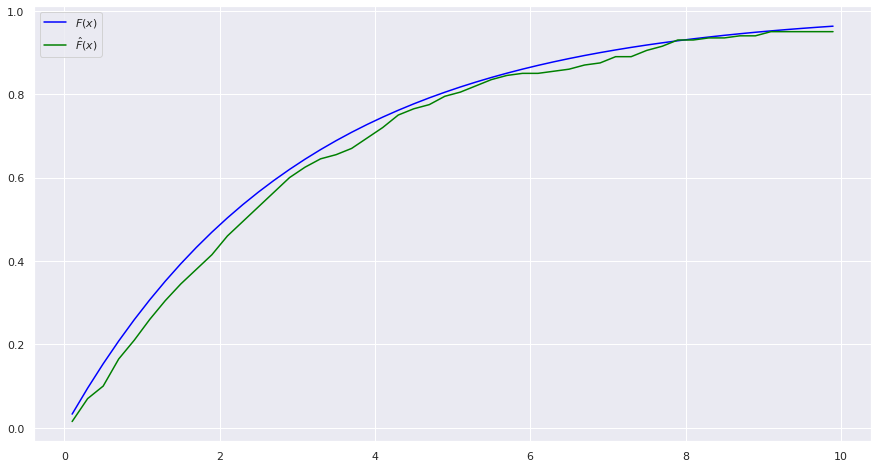

In [48]:
import numpy as np
import numpy.random as nprd

## 设定参数

b = 3  #指数分布参数
N = 200  #样本容量

## 生成N个x~F(x)=1-exp{-(1/b)*x}
X = -b * np.log(nprd.random(N))

## 给定一些点，在这些点上计算分布函数和经验分布函数
x = np.linspace(0.1, 9.9, 50)  #0.1,0.3,...,9.9

## 计算理论的分布函数
F = 1 - np.exp((-1 / b) * x)

## 计算经验分布函数

empirical_F = lambda s: np.sum(X <= s) / N  # lambda表达式，定义了s点处的经验分布函数
F_hat = np.array(list(map(empirical_F, x)))  # 计算x的所有点的经验分布函数

## 计算经验分布函数与真实的分布函数之间的绝对差异
bias = np.abs(F - F_hat)
## 打印两个分布函数及其绝对差异，以及平均的绝对差异
# print(" x  | 分布函数| 经验分布函数| 差的绝对值")
# for i in range(50):
#     print("%.1f |%.5f | %.5f  | %.5f" % (x[i],F[i],F_hat[i],bias[i]))
# print("Mean absolute bias:",np.sum(bias)/50)

## 导入matplotlib
import matplotlib.pyplot as plt
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 8.0)

plt.plot(x, F, label=r'$F(x)$', color='blue')  ## 画出理论的分布函数
plt.plot(x, F_hat, label=r'$\hat{F}(x)$', color='green')  ## 画出经验分布函数
plt.legend(loc='upper left', frameon=True)
plt.show()  ## 画图


## 实例3：停止的鞅

现在考虑这么一个问题：如果我有100块钱，现在可以进行赌博，每次以0.5的概率赚一块钱，以0.5的概率赔一块钱，转到130我就收手，那么我的财富应该会如何变化？以下的程序模拟了这个问题：

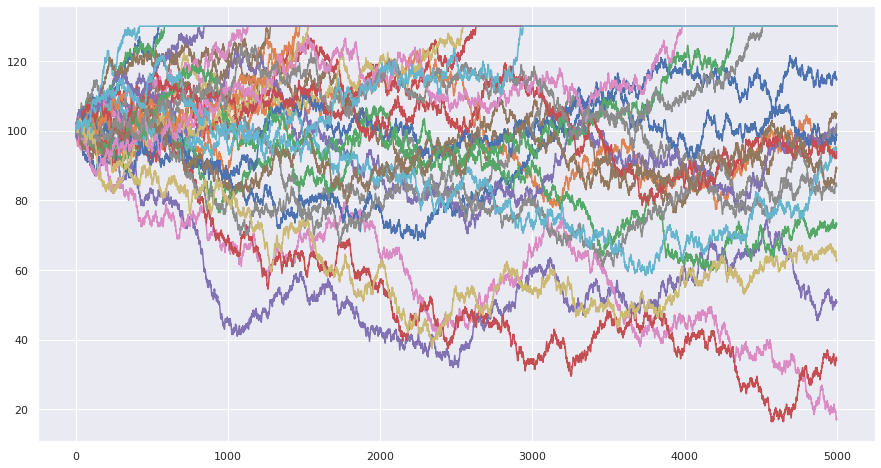

In [49]:
import numpy as np
import numpy.random as nprd

T = 5000
x0 = 100


def gen_martingale():
    """生成鞅，直观的写法"""
    X = []
    x = x0
    for t in range(T):
        if x >= 130:
            x = x
        else:
            x = x + (1 if nprd.uniform() > 0.5 else -1)
        X.append(x)
    return X


def gen_martingale2():
    """生成鞅，更好的写法，避免循环"""
    x = (nprd.uniform(0, 1, T) > 0.5) - 0.5
    x = x.cumsum() + x0
    hit = np.where(x >= 130)[0]
    if hit.size > 0:
        x[hit[0]:] = 130
    return x


import matplotlib.pyplot as plt
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 8.0)
N = 30
t = [t for t in range(T)]
corlors = np.linspace(0, 1, N)
for i in range(N):
    x = gen_martingale2()
    plt.plot(t, x)
plt.show()  ## 画图


## 实例4：大数定律和中心极限定理

我们知道，根据大数定律，样本均值收敛到总体均值，即$\bar{x}\rightarrow_p\mu$，以下代码通过产生10000个服从0-1分布的随机数（真实概率为0.5，比如抛硬币），计算了前n次的均值，并将其花在图上：

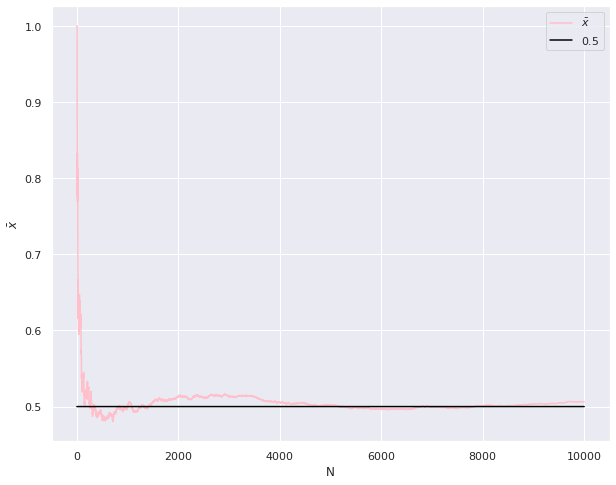

In [50]:
import numpy as np
from numpy import random as nprd

True_P = 0.5


def sampling(N):
    ## 产生Bernouli样本
    x = nprd.rand(N) < True_P
    return x


M = 10000  #模拟次数
xbar = np.zeros(M)
N = np.array([i + 1 for i in range(M)])
x = sampling(M)
for i in range(M):
    if i == 0:
        xbar[i] = x[i]
    else:
        xbar[i] = (x[i] + xbar[i - 1] * i) / (i + 1)

## 导入matplotlib
import matplotlib.pyplot as plt
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)

plt.plot(N, xbar, label=r'$\bar{x}$', color='pink')  ## xbar
xtrue = np.ones(M) * True_P
plt.plot(N, xtrue, label=r'$0.5$', color='black')  ## true xbar
plt.xlabel('N')
plt.ylabel(r'$\bar{x}$')
plt.legend(loc='upper right', frameon=True)
plt.show()  ## 画图


而根据中心极限定理，当样本量足够大时，样本均值服从正态分布：$$\bar{x}\sim N\left(\mu,\sigma^2/N\right)$$，以下代码，根据不同的样本量（N），分别产生一些混合正态分布（双峰的），并计算其均值，计算2000次样本均值，并观察给定样本量的条件下2000次样本均值的分布情况。最终将样本均值的分布情况

/tmp/ipykernel_766/1473168965.py:35: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  plt.hist(x, bins=30, normed=1)  ## histgram


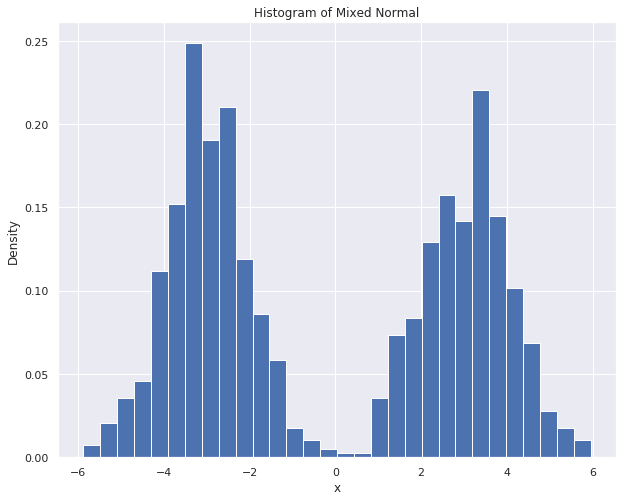

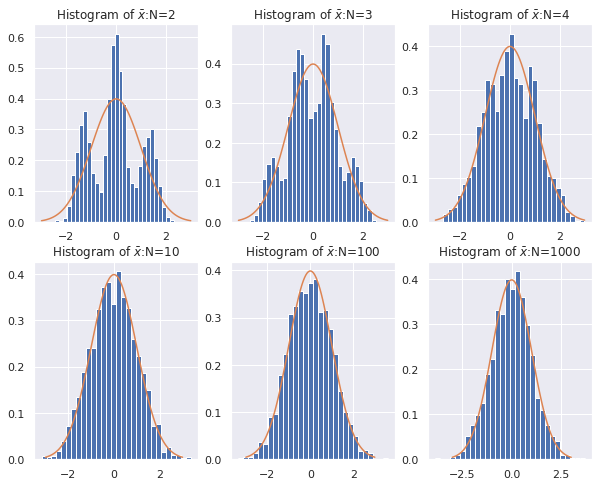

In [51]:
import numpy as np
from numpy import random as nprd


def sampling(N):
    ## 产生一组样本，以0.5的概率为z+3，0.5的概率为z-3，其中z~N(0,1)
    d = nprd.rand(N) < 0.5
    z = nprd.randn(N)
    x = np.array([z[i] + 3 if d[i] else z[i] - 3 for i in range(N)])
    return x


N = [2, 3, 4, 10, 100, 1000]  # sample size
M = 2000
MEANS = []
for n in N:
    mean_x = np.zeros(M)
    for i in range(M):
        x = sampling(n)
        mean_x[i] = np.mean(x) / np.sqrt(10 / n)  ## 标准化，因为var(x)=10
    MEANS.append(mean_x)

## 导入matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)

x = sampling(1000)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Mixed Normal')
plt.hist(x, bins=30, normed=1)  ## histgram
plt.show()  ## 画图

## 样本均值
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 3, 4)
ax5 = plt.subplot(2, 3, 5)
ax6 = plt.subplot(2, 3, 6)

## normal density
x = np.linspace(-3, 3, 100)
d = [1.0 / np.sqrt(2 * np.pi) * np.exp(-i**2 / 2) for i in x]


def plot_density(ax, data, N):
    ax.hist(data, bins=30, density=1)  ## histgram
    ax.plot(x, d)
    ax.set_title(r'Histogram of $\bar{x}$:N=%d' % N)


plot_density(ax1, MEANS[0], N[0])
plot_density(ax2, MEANS[1], N[1])
plot_density(ax3, MEANS[2], N[2])
plot_density(ax4, MEANS[3], N[3])
plot_density(ax5, MEANS[4], N[4])
plot_density(ax6, MEANS[5], N[5])

plt.show()  ## 画图


## 实例5：极大似然估计，使用SciPy的优化工具箱

接下来我们使用极大似然估计方法对Beta分布的参数进行估计，并进行模拟。

由于Beta分布的对数似然函数为$$\ln \left( \alpha, \beta | x \right)=\sum_{i=1}^N \left[ -\ln (Beta(\alpha,\beta))+(\alpha-1) \ln (x_i) + (\beta-1)\ln (1-x_i) \right]$$
最大化似然函数，或者最小化负的似然函数，即可得到极大似然估计。

Bias =  [0.05018493 0.01441292]
s.e. =  [0.32906383 0.09135609]
RMSE =  [0.33286864 0.09248604]


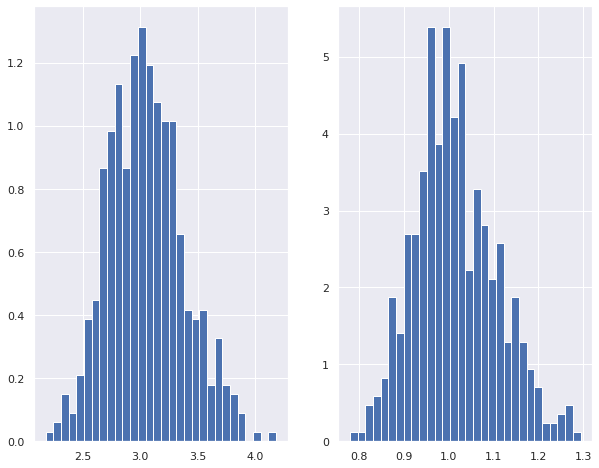

In [52]:
import numpy as np
from numpy import random as nprd
from scipy.optimize import minimize
import scipy as sc


def sampling(a, b, N):
    x = nprd.beta(a, b, N)
    return x


def estimate(x):

    def log_likelihood(theta):
        likeli = np.array([
            -1 * np.log(sc.special.beta(theta[0], theta[1])) +
            (theta[0] - 1) * np.log(xi) + (theta[1] - 1) * np.log(1 - xi)
            for xi in x
        ])
        return -1 * np.mean(likeli)

    res = minimize(log_likelihood,
                   np.array([1, 1]),
                   method='nelder-mead',
                   options={
                       'xtol': 1e-4,
                       'disp': False
                   })
    return res


M = 500  ## simulation times
N = 200  ## sample size
a = 3
b = 1  ## true value
RESULT = np.zeros((M, 2), np.float64)
for m in range(M):
    x = sampling(a, b, N)
    res = estimate(x)
    RESULT[m] = res.x

MEAN_RESULT = np.average(RESULT, 0)
BIAS = MEAN_RESULT - np.array([a, b])
STD = np.std(RESULT, 0)
MSE2 = np.array([i**2 for i in STD]) + np.array([i**2 for i in BIAS])
MSE = np.array([np.sqrt(i) for i in MSE2])
print("Bias = ", BIAS)
print("s.e. = ", STD)
print("RMSE = ", MSE)

## 画图
import matplotlib.pyplot as plt
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)
## 样本均值
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
ax1.hist(RESULT[:, 0], bins=30, density=1)
ax2.hist(RESULT[:, 1], bins=30, density=1)
plt.show()